In [59]:
#import everything first
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
print(dataset.shape)
print(dataset.head())
print(dataset.describe())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
#now that we have a sense of the data, let's go check out what's happening in each class
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


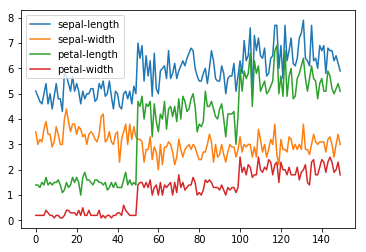

In [4]:
#recall from above that plt is matplotlib.pyplot
#below is something very funny (ewwwww)
dataset.plot()
plt.show()

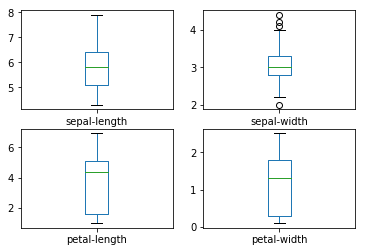

In [5]:
#recall from above that plt is matplotlib.pyplot
#box n whisker
#subplots means it seperates into a few plots
#layout means dimension
dataset.plot(kind = 'box', subplots = True, layout=(2,2), sharex=False, sharey=False)
plt.show()

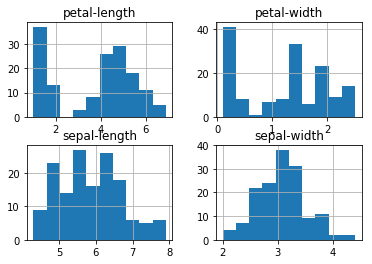

In [6]:
dataset.hist()
plt.show()

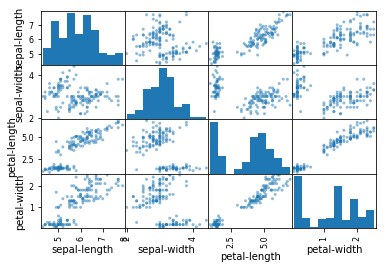

In [7]:
#multivariate: (investigate regression)
scatter_matrix(dataset)
plt.show()

In [16]:
#Evaluate some machine learning algorithm
#first we change it into array
myarray = dataset.values
X = myarray[:, 0:4] #the numerical values
Y = myarray[:, 4] # the one we gonna classify
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train)
print()
print(X_validation)
print()
print(Y_train)
print()
print(Y_validation)

[[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.0 5.9 2.1]
 [6.7 3.3 5.7 2.1]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [6.5 3.0 5.5 1.8]
 [5.7 3.0 4.2 1.2]
 [5.0 3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.0 2.2 4.0 1.0]
 [6.4 2.7 5.3 1.9]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [4.3 3.0 1.1 0.1]
 [6.3 3.3 6.0 2.5]
 [5.5 2.4 3.7 1.0]
 [5.0 2.0 3.5 1.0]
 [6.5 2.8 4.6 1.5]
 [5.0 3.4 1.6 0.4]
 [4.4 2.9 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [6.7 3.1 4.7 1.5]
 [7.3 2.9 6.3 1.8]
 [5.5 2.6 4.4 1.2]
 [5.2 2.7 3.9 1.4]
 [5.7 4.4 1.5 0.4]
 [7.2 3.2 6.0 1.8]
 [5.4 3.4 1.7 0.2]
 [5.8 4.0 1.2 0.2]
 [6.1 2.6 5.6 1.4]
 [5.7 2.5 5.0 2.0]
 [4.8 3.0 1.4 0.1]
 [6.5 3.0 5.8 2.2]
 [4.6 3.2 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 3.0 5.2 2.3]
 [6.1 3.0 4.6 1.4]
 [5.7 3.8 1.7 0.3]
 [7.0 3.2 4.7 1.4]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.2 2.0]
 [7.7 2.6 6.9 2.3]
 [4.9 2.4 3.

In [17]:
models = []
models.append(('LR', LogisticRegression())) #linear
models.append(('LDA', LinearDiscriminantAnalysis())) #linear
models.append(('KNN', KNeighborsClassifier())) #nonlinear
models.append(('CART', DecisionTreeClassifier())) #nonlinear
models.append(('NB', GaussianNB())) #nonlinear
models.append(('SVM', SVC())) #nonlinear
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', 

In [22]:
seed = 7
scoring = 'accuracy'

In [30]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    print(kfold) #probably just an algorithm
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    #now we have all the data
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

KFold(n_splits=10, random_state=7, shuffle=False)
[1.         1.         0.91666667 1.         1.         1.
 0.91666667 0.91666667 0.91666667 1.        ]
KFold(n_splits=10, random_state=7, shuffle=False)
[1.         1.         1.         0.91666667 1.         1.
 0.91666667 1.         0.91666667 1.        ]
KFold(n_splits=10, random_state=7, shuffle=False)
[1.         1.         1.         1.         1.         1.
 0.91666667 1.         1.         0.91666667]
KFold(n_splits=10, random_state=7, shuffle=False)
[1.         1.         1.         1.         1.         1.
 0.91666667 1.         0.91666667 1.        ]
KFold(n_splits=10, random_state=7, shuffle=False)
[1.         1.         1.         0.91666667 1.         1.
 1.         1.         0.83333333 1.        ]
KFold(n_splits=10, random_state=7, shuffle=False)
[1.         1.         1.         1.         1.         1.
 0.91666667 1.         1.         1.        ]


In [31]:
print(len(names), len(results))
for i in range (0, len(names)):
    print(names[i]), 
    print(results[i].mean(), results[i].std())

6 6
LR
0.9666666666666666 0.04082482904638632
LDA
0.975 0.03818813079129868
KNN
0.9833333333333332 0.03333333333333335
CART
0.9833333333333332 0.03333333333333335
NB
0.975 0.053359368645273735
SVM
0.9916666666666666 0.025000000000000012


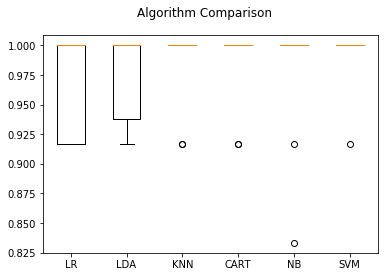

In [49]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [53]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



In [54]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.89      0.73      0.80        11

    avg / total       0.87      0.87      0.87        30



In [56]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predictions = gnb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



In [57]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

